In [17]:
from trafic import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def indice_voiture(route, i):
    return np.where(route == i)[0]


def calculer_flux(route1, route2, taille, nb_voitures):
    deplacement = 0
    for i in range(1, nb_voitures+1):
        pos1 = indice_voiture(route1, i)
        pos2 = indice_voiture(route2, i)
        deplacement += (pos2-pos1)%taille
    return deplacement/nb_voitures


def flux_chaine(chaine, taille, nb_voitures):
    flux = []
    for r1, r2 in zip(chaine, chaine[1:]):
        flux.append(calculer_flux(r1, r2, taille, nb_voitures))
    return np.array(flux)


def calculer_embouteillage(route, taille):
    somme = 0
    i = 0
    while i < taille:
        if route[i] != 0:
            j = i+1
            while route[j%taille] == 0:
                j += 1
            d = j-i
            somme += 1/(d**2)
            i = j
        else:
            i += 1
    return somme

In [48]:
route = route_unif(100, 30)
cm = CM_Route(route, 100, 5, 0.3)
print(calculer_embouteillage(cm[-1], 100))

8.0272052154195


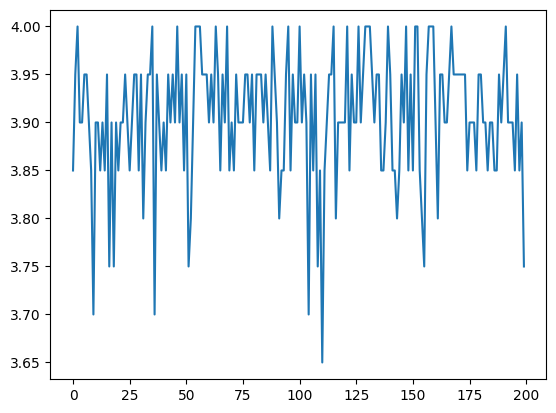

In [4]:
cm = CM_Route(route_unif(100, 20), 200, 10, 0.1)
plt.plot(flux_chaine(cm, 100, 20))
plt.show()

## Test en faisant varier le nombre de voitures

In [4]:
# Périphérique de toulouse : 35km = 7000 cases de 5m
taille = 7000
nb_voitures = [500, 1000, 2000, 3000]

# Vitesse max : 90km/h = 25m/s = 5c/s
vmax = 5
p = 0.1

periphs = [route_unif(taille, n) for n in nb_voitures]
cms = [CM_Route(periph, 60, vmax, p) for periph in periphs]

In [5]:
flux = [flux_chaine(cm, taille, n) for cm, n in zip(cms, nb_voitures)]

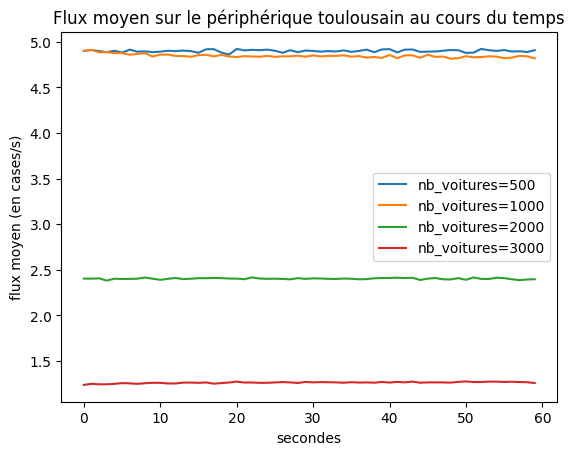

In [ ]:
for i in range(len(nb_voitures)):
    plt.plot(flux[i], label=f'nb_voitures={nb_voitures[i]}')

plt.title('Flux sur le périphérique toulousain au cours du temps')
plt.legend()
plt.xlabel('secondes')
plt.ylabel('flux (en cases/s)')
plt.show()

Cette première analyse nous montre que le trafic est moins fluide quand il y a plus de voitures sur le périphérique, notamment aux heures de pointes.

## Test en faisant varier la limite de vitesse

In [7]:
# Périphérique de toulouse : 35km = 7000 cases de 5m
taille = 7000
nb_voitures = 2000

# Vitesses max : 
# 5c/s = 25m/s = 90km/h
# 4c/s = 20m/s = 72km/h
# 3c/s = 15m/s = 54km/h
vmax = [5, 4, 3]
p = 0.1

periph = route_unif(taille, nb_voitures)
cms = [CM_Route(periph, 60, v, p) for v in vmax]

In [8]:
flux = [flux_chaine(cm, taille, nb_voitures) for cm in cms]

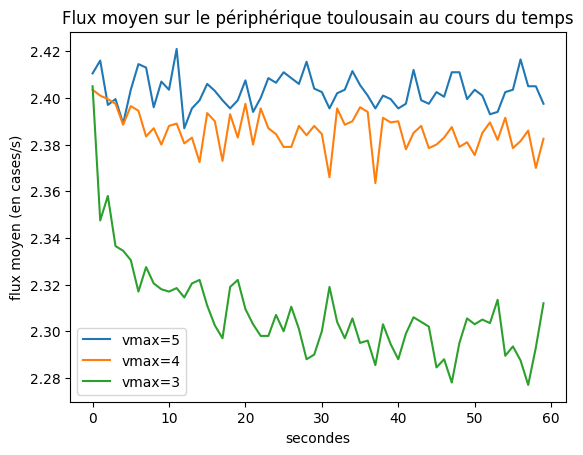

In [ ]:
for i in range(len(vmax)):
    plt.plot(flux[i], label=f'vmax={vmax[i]}')

plt.title('Flux sur le périphérique toulousain au cours du temps')
plt.legend()
plt.xlabel('secondes')
plt.ylabel('flux (en cases/s)')
plt.show()

On remarque que pour un nombre de voitures particulièrement élevé (2000 voitures), on a des déplacements moyens assez similaires entre les limites de vitesse de 90km/h et 72km/h, et un peu en dessous pour la limite de vitesse de 54km/h.

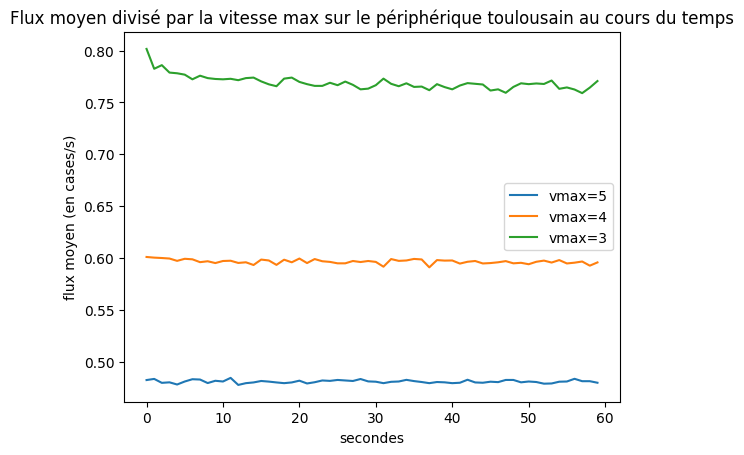

In [ ]:
for i in range(len(vmax)):
    plt.plot(flux[i]/vmax[i], label=f'vmax={vmax[i]}')

plt.title('Flux divisé par la vitesse max sur le périphérique toulousain au cours du temps')
plt.legend()
plt.xlabel('secondes')
plt.ylabel('flux (en cases/s)')
plt.show()

Cependant, sur ce même exemple, le ratio entre la limite de vitesse et le flux moyen observé est nettement meilleur sur la limite de vitesse de 54km/h. En effet, les voitures roulent à environ 77% de la limite de vitesse si elle est définie à 54km/h, contre moins de 50% si la limite est de 90km/h.

In [38]:
taille = 100
p = [0, 0.1, 0.3, 0.5]
vmax = 5

nb_voitures = np.arange(1, taille+1)
flux = np.zeros((len(p), len(nb_voitures)))

for i, n in enumerate(nb_voitures):
    route = route_unif(taille, n)
    for j, pj in enumerate(p):
        cm = CM_Route(route, 100, vmax, pj)
        flux[j][i] = calculer_flux(cm[-2], cm[-1], taille, n)


/tmp/ipykernel_967/580375169.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flux[j][i] = calculer_flux(cm[-2], cm[-1], taille, n)


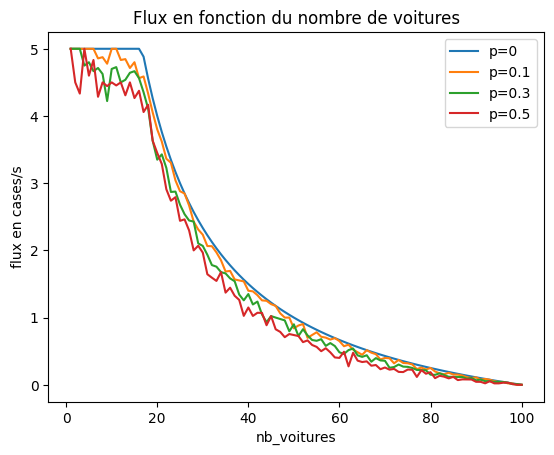

In [11]:
for j, pj in enumerate(p):
    plt.plot(nb_voitures, flux[j], label=f'p={pj}')
plt.title("Flux en fonction du nombre de voitures")
plt.xlabel('nb_voitures')
plt.ylabel('flux en cases/s')
plt.legend()
plt.show()

In [54]:
taille = 100
p = [0, 0.1, 0.3, 0.5]
vmax = np.arange(1, 11)
nb_voitures = 30

emb = np.zeros((len(p), len(vmax)))
route = route_unif(taille, nb_voitures)
for i, pi in enumerate(p):
    for j, vj in enumerate(vmax):
        cm = CM_Route(route, 100, vj, pi)
        emb[i][j] = calculer_embouteillage(cm[-1], taille)

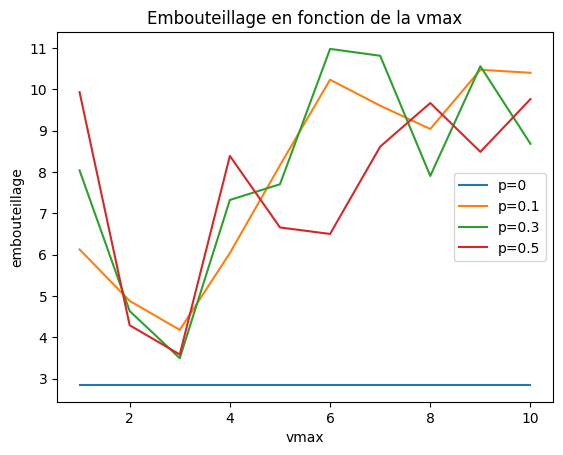

In [55]:
for i, pi in enumerate(p):
    plt.plot(vmax, emb[i], label=f'p={pi}')
plt.title("Embouteillage en fonction de la vmax")
plt.xlabel('vmax')
plt.ylabel('embouteillage')
plt.legend()
plt.show()

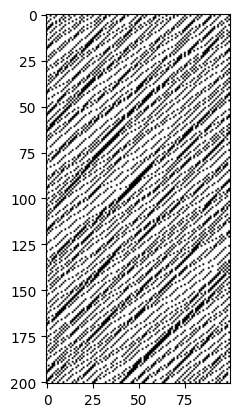

In [53]:
route = route_unif(100, 30)
cm = CM_Route(route, 200, 5, 0.3)
image = cm.copy()
image[image > 0] = 1
image = ~image
plt.imshow(image, cmap='gray')
plt.show()